In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime as dt
%matplotlib inline
import os
import sys 
from tqdm import tqdm

sys.path.append('/home/drdarby/Desktop/cape_mend_SM_LCS/datatools')
import datatools as tools
import cmocean as cm
import gsw
from scipy.interpolate import griddata
import xgcm
print(xgcm.__path__)
path_llc270 = '/media/drdarby/Elements/data/llc270/'


['/home/drdarby/miniconda3/envs/mitgcm/lib/python3.11/site-packages/xgcm']


In [6]:
path_llc270 = '/media/drdarby/Elements/data/llc270/'

THETA_snap_files, THETA_snap_filepaths = tools.get_data_paths_from_binary(path_llc270, 'THETA_snap', file_end = 'nc' )
ETAN_snap_files, ETAN_snap_filepaths = tools.get_data_paths_from_binary(path_llc270, 'ETAN_snap', file_end = 'nc' )
#THETA_files, THETA_filepaths = tools.get_data_paths_from_binary(path_llc270, 'THETA', file_end = 'nc' )

ADVr_TH_files, ADVr_TH_filepaths = tools.get_data_paths_from_binary(path_llc270, 'ADVr_TH', file_end = 'nc' )
ADVx_TH_files, ADVx_TH_filepaths = tools.get_data_paths_from_binary(path_llc270, 'ADVx_TH', file_end = 'nc' )
ADVy_TH_files, ADVy_TH_filepaths = tools.get_data_paths_from_binary(path_llc270, 'ADVy_TH', file_end = 'nc' )
DFxE_TH_files, DFxE_TH_filepaths = tools.get_data_paths_from_binary(path_llc270, 'DFxE_TH', file_end = 'nc' )
DFyE_TH_files, DFyE_TH_filepaths = tools.get_data_paths_from_binary(path_llc270, 'DFyE_TH', file_end = 'nc' )
DFrE_TH_files, DFrE_TH_filepaths = tools.get_data_paths_from_binary(path_llc270, 'DFrE_TH', file_end = 'nc' )
DFrI_TH_files, DFrI_TH_filepaths = tools.get_data_paths_from_binary(path_llc270, 'DFrI_TH', file_end = 'nc' )
TFLUX_files, TFLUX_filepaths = tools.get_data_paths_from_binary(path_llc270, 'TFLUX', file_end = 'nc' )
oceQsw_files, oceQsw_filepaths = tools.get_data_paths_from_binary(path_llc270, 'oceQsw', file_end = 'nc' )

THETA = xr.open_mfdataset(THETA_snap_filepaths).isel(tile = 6)
#SALT = xr.open_mfdataset(THETA_snap_filepaths).isel(tile = 6)

ETAN = xr.open_mfdataset(ETAN_snap_filepaths).isel(tile = 6)
ADVr_TH = xr.open_mfdataset(ADVr_TH_filepaths[24]).isel(tile = 6)
ADVx_TH = xr.open_mfdataset(ADVx_TH_filepaths).isel(tile = 6)
ADVy_TH = xr.open_mfdataset(ADVy_TH_filepaths).isel(tile = 6)
DFxE_TH = xr.open_mfdataset(DFxE_TH_filepaths).isel(tile = 6)
DFyE_TH = xr.open_mfdataset(DFyE_TH_filepaths).isel(tile = 6)
DFrE_TH = xr.open_mfdataset(DFrE_TH_filepaths).isel(tile = 6)
DFrI_TH = xr.open_mfdataset(DFrI_TH_filepaths).isel(tile = 6)
TFLUX = xr.open_mfdataset(TFLUX_filepaths).isel(tile = 6)
oceQsw = xr.open_mfdataset(oceQsw_filepaths).isel(tile = 6)

In [7]:
u_files, u_filepath = tools.get_data_paths_from_binary(path_llc270,'UVEL',file_end='nc')
v_files, v_filepath = tools.get_data_paths_from_binary(path_llc270,'VVEL',file_end='nc')


model_salt_files, model_salt_filepath = tools.get_data_paths_from_binary(path_llc270,'SALT',file_end='nc')
model_salt = xr.open_mfdataset(model_salt_filepath).isel(tile = 6)
model_temp_files, model_temp_filepath = tools.get_data_paths_from_binary(path_llc270,'THETA',file_end='nc')
model_temp = xr.open_mfdataset(model_temp_filepath).isel(tile = 6)



In [8]:
grid_files, grid_filepaths = tools.get_data_paths_from_binary(path_llc270, 'Grid', file_end = 'nc' )
grid = xr.open_mfdataset(grid_filepaths[6])
grid = grid.rename({'i1':'k','i2':'j','i3':'i'})
grid['i'] = (grid['i']-1).astype(int)
grid['j'] = (grid['j']-1).astype(int)
grid['k'] = (grid['k'] -1).astype(int)

In [159]:
np.sqrt(50**2+23**2)

55.036351623268054

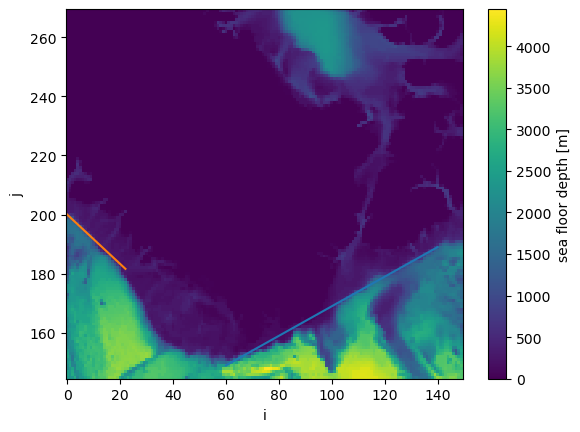

In [134]:
grid.Depth.isel(i=slice(0,150),j=slice(145,270)).plot()

In [9]:
x_left=np.linspace(0,23,50)
x_right = np.linspace(102,150,70)
y_left = ((150-200)/60)*x_left+200
y_right =((190-150)/80)*x_right+118


i_corr_left = x_left#.round().astype('int')
j_corr_left = ((150-200)/55)*i_corr_left+200
j_corr_left = j_corr_left#.round().astype('int')
i_per_1 = np.linspace(23,34,500).astype('int')
j_per_1 = ((160-180)/10)*i_per_1+225
i_per_2 = np.linspace(34,60,50)
j_per_2 = ((150-160)/35)*i_per_2+167
i_per_3 =np.linspace(60,90,50)
j_per_3 = ((175-150)/68)*i_per_3+128

i_corr_right = x_right#.round().astype('int')

j_corr_right =((190-150)/80)*i_corr_right+119
j_corr_right = j_corr_right#.round().astype('int')

i_final = np.linspace(90,102,50)
j_final = (11/15)*i_final+95

#y_left.round().astype('int')[::-1]

In [48]:
j_corr_right.round()

array([170., 170., 171., 171., 171., 172., 172., 172., 173., 173., 173.,
       174., 174., 175., 175., 175., 176., 176., 176., 177., 177., 177.,
       178., 178., 178., 179., 179., 179., 180., 180., 180., 181., 181.,
       181., 182., 182., 183., 183., 183., 184., 184., 184., 185., 185.,
       185., 186., 186., 186., 187., 187., 187., 188., 188., 188., 189.,
       189., 189., 190., 190., 191., 191., 191., 192., 192., 192., 193.,
       193., 193., 194., 194.])

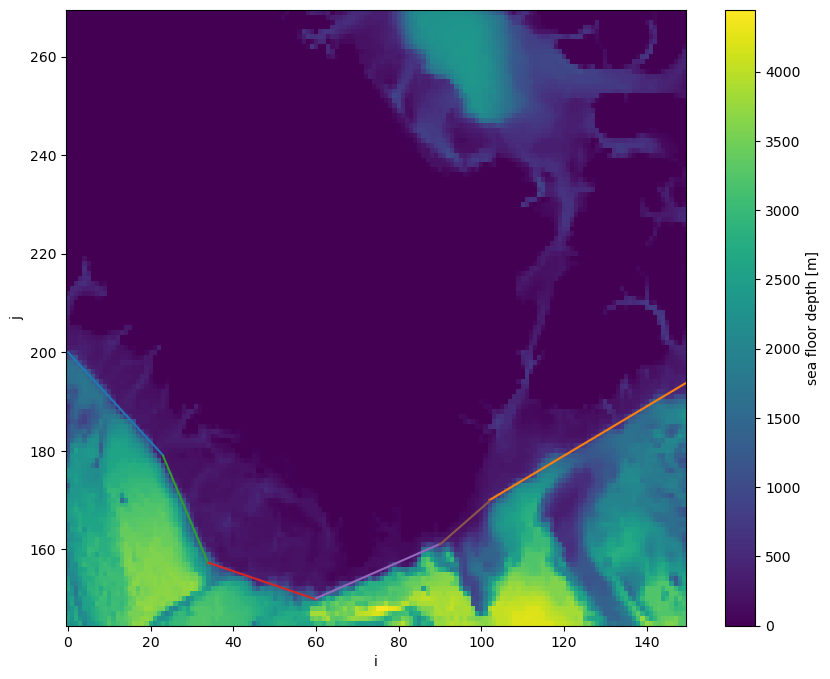

In [4]:
depth = grid.Depth.isel(i=slice(0,150),j=slice(145,270))
#depth = depth.where((depth>450)&(depth<550))
depth.plot(figsize=(10,8))
plt.plot(i_corr_left,j_corr_left)
plt.plot(i_corr_right,j_corr_right)
plt.plot(i_per_1,j_per_1)
plt.plot(i_per_2,j_per_2)
plt.plot(i_per_3,j_per_3)
plt.plot(i_final,j_final)

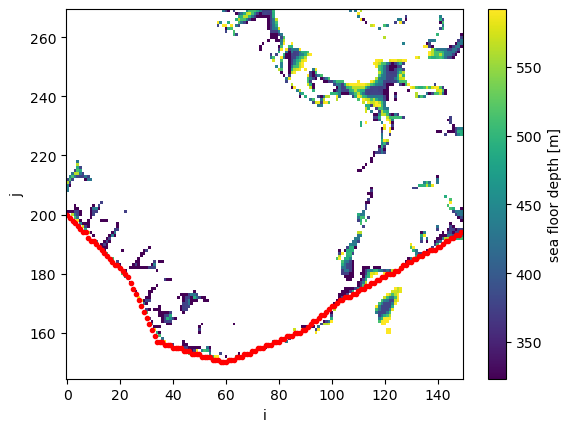

In [513]:
depth.where((depth>300)&(depth<600)).plot()

In [10]:
#THETA['THETA'].sel(i=i_corr_left,j=j_corr_left).isel(k=0,time=0).plot()
transect_i = np.concatenate([i_corr_left,i_per_1,i_per_2,i_per_3,i_final,i_corr_right])
transect_j = np.concatenate([j_corr_left,j_per_1,j_per_2,j_per_3,j_final,j_corr_right])

i,j = np.meshgrid(np.array(THETA['THETA'].i),np.array(THETA['THETA'].j))


points_tuple = [] 
for k in range(0,len(transect_i)):
    absi = np.abs(i-transect_i[k])
    absj = np.abs(j-transect_j[k])
    c = np.maximum(absi, absj)
    ind = np.unravel_index(np.argmin(np.array(c), axis=None),c.shape)
    points_tuple.append(ind)

points_i = []
points_j = []
for h in range(0,len(list(dict.fromkeys(points_tuple)))):
    tups = list(dict.fromkeys(points_tuple))[h]
    points_i.append(tups[1])
    points_j.append(tups[0])

150

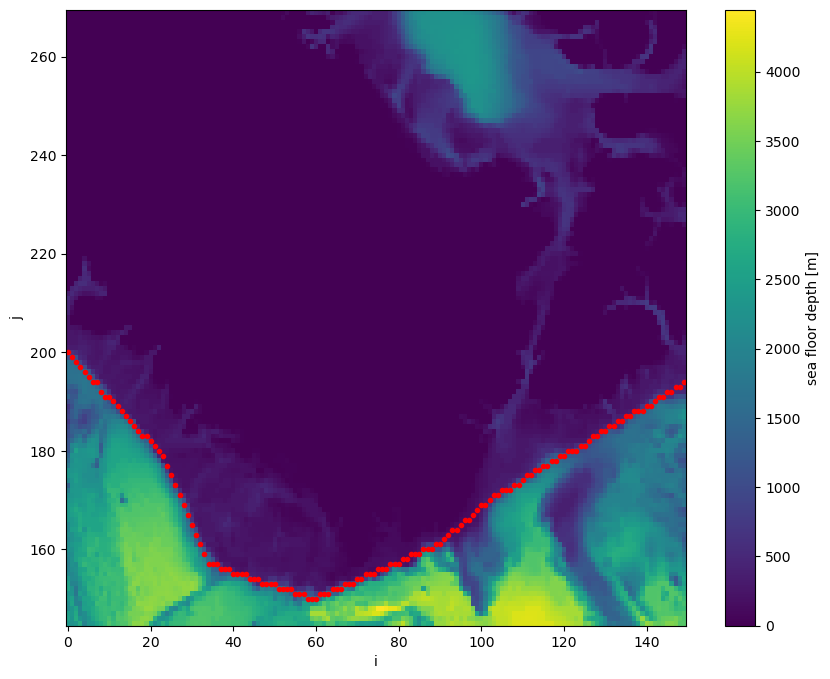

In [11]:
depth.plot(figsize=(10,8))
# plt.plot(points_i_corr,points_j_corr,'r.')
points_j_corr =  np.interp(np.array(THETA['THETA'].isel(i=slice(0,150)).i),points_i,points_j)
points_i_corr = np.array(THETA['THETA'].isel(i=slice(0,150)).i)
#depth.sel(j=slice(145,220))
plt.plot(points_i_corr,points_j_corr,'r.')
len(points_j_corr)

In [12]:
depth_of_shelf =[]
for l in range(0,len(points_j_corr)):
    selection = depth.isel(i=slice(0,150)).sel(j=slice(145,220))[:,l].where(depth.j>points_j_corr[l])
    depth_of_shelf.append(np.array(selection))
#plt.plot(points_i_corr,points_j_corr,'r.')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

(76, 150)

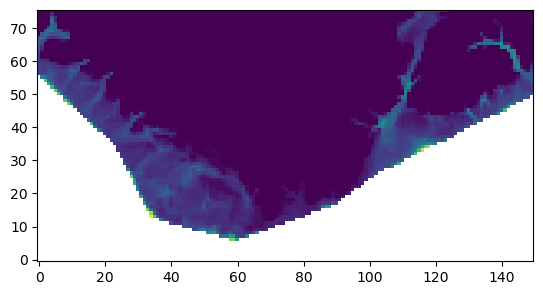

In [13]:
plt.imshow(np.array(depth_of_shelf).T)
plt.gca().invert_yaxis()
np.shape(np.array(depth_of_shelf).T)

In [528]:
model_temp

<xarray.Dataset>
Dimensions:   (j: 270, i: 270, k: 50, time: 312)
Coordinates:
    tile      int64 6
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    timestep  (time) int64 dask.array<chunksize=(12,), meta=np.ndarray>
  * time      (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16T12:00:00
Data variables:
    THETA     (time, k, j, i) float32 dask.array<chunksize=(12, 50, 270, 270), meta=np.ndarray>

In [14]:
shelf_mask = np.isfinite(np.array(depth_of_shelf).T)

#model_temp['THETA'].isel(j=slice(145,220),i=slice(0,150)).mean(dim='k',skipna=True).where(shelf_mask[1:,:]).mean(dim='i',skipna=True).mean(dim='j',skipna=True).plot()

In [490]:
# points_j_corr =  np.interp(np.array(THETA['THETA'].isel(i=slice(0,150)).i),points_i,points_j)
# points_i_corr = np.array(THETA['THETA'].isel(i=slice(0,150)).i)
# #np.array(THETA['THETA'].isel(i=slice(0,60),j=(157,200)))

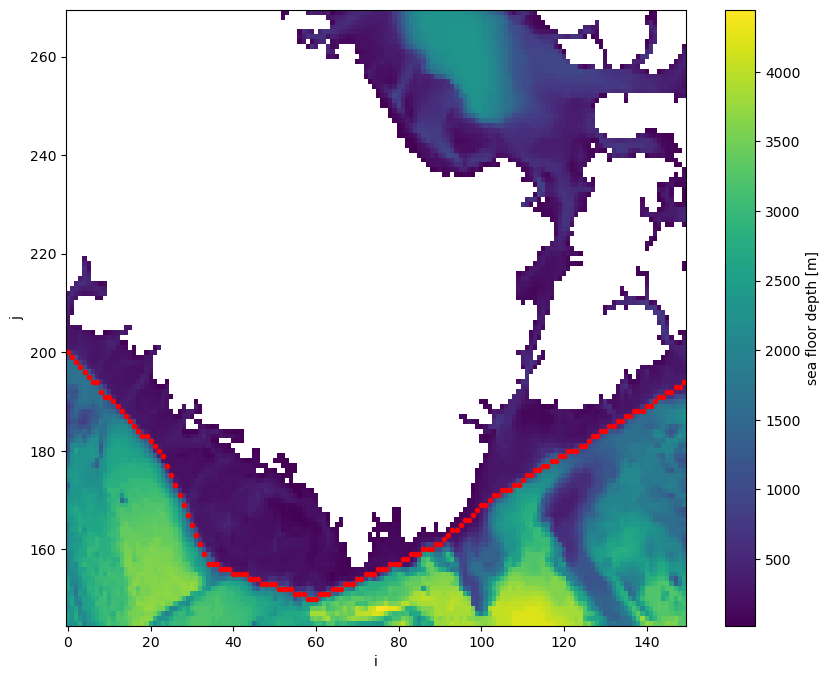

In [476]:
depth.plot(figsize=(10,8))

plt.plot(points_i_corr,np.interp(np.array(THETA['THETA'].j),points_i_corr,points_j_corr),'r.')

In [573]:
np.array(grid['RC'])

array([-5.00000000e+00, -1.50000000e+01, -2.50000000e+01, -3.50000000e+01,
       -4.50000000e+01, -5.50000000e+01, -6.50000000e+01, -7.50049973e+01,
       -8.50250015e+01, -9.50950012e+01, -1.05309998e+02, -1.15870003e+02,
       -1.27150002e+02, -1.39740005e+02, -1.54470001e+02, -1.72399994e+02,
       -1.94735001e+02, -2.22710007e+02, -2.57470001e+02, -2.99929993e+02,
       -3.50679993e+02, -4.09929993e+02, -4.77470001e+02, -5.52710022e+02,
       -6.34734985e+02, -7.22400024e+02, -8.14469971e+02, -9.09739990e+02,
       -1.00715503e+03, -1.10590503e+03, -1.20553503e+03, -1.30620496e+03,
       -1.40915002e+03, -1.51709497e+03, -1.63417505e+03, -1.76513501e+03,
       -1.91415002e+03, -2.08403491e+03, -2.27622510e+03, -2.49125000e+03,
       -2.72925000e+03, -2.99025000e+03, -3.27425000e+03, -3.58125000e+03,
       -3.91125000e+03, -4.26425000e+03, -4.64025000e+03, -5.03925000e+03,
       -5.46125000e+03, -5.90625000e+03])

In [15]:
temp_cont = model_temp['THETA'].isel(j=slice(145,220),i=slice(0,150)).where(grid['RC']<-200)#.where(shelf_mask[1:,:])
salt_cont = model_salt['SALT'].isel(j=slice(145,220),i=slice(0,150)).where(grid['RC']<-200)#.where(shelf_mask[1:,:])
heat_270 = gsw.cp_t_exact(temp_cont, salt_cont, grid['RC']*-1).rename('heat_270')


In [ ]:
model_temp['THETA']

/home/drdarby/miniconda3/envs/mitgcm/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in cp_t_exact
  return func(*(_execute_task(a, cache) for a in args))


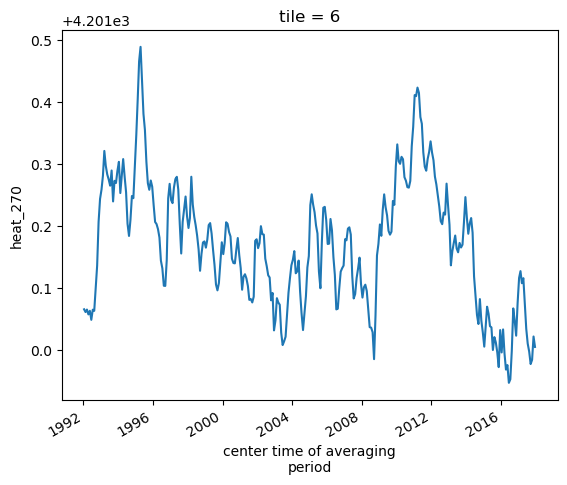

In [575]:
heat_270.where(shelf_mask[1:,:]).mean(dim='k',skipna=True).mean(dim='i',skipna=True).mean(dim='j',skipna=True).plot()

### advection term

In [16]:
ADVy_TH = ADVy_TH.rename({'j_g':'j'})
ADVx_TH = ADVx_TH.rename({'i_g':'i'})
DFxE_TH = DFxE_TH.rename({'i_g':'i'})
DFyE_TH = DFyE_TH.rename({'j_g':'j'})



<xarray.Dataset>
Dimensions:   (j: 270, k: 50, i: 270, time: 12)
Coordinates:
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    tile      int64 6
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
    timestep  (time) int64 dask.array<chunksize=(12,), meta=np.ndarray>
  * time      (time) datetime64[ns] 2016-01-16T12:00:00 ... 2016-12-16T12:00:00
Data variables:
    ADVy_TH   (time, k, j, i) float32 dask.array<chunksize=(12, 50, 270, 270), meta=np.ndarray>

In [539]:
points_j_corr.astype('int')
points_i_corr

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [ ]:
ADVx_TH
ADVy_TH
DFxE_TH
DFyE_TH

In [570]:
temp = model_temp['THETA']#.where(shelf_mask[1:,:])
salt = model_salt['SALT']
#subsample
i,j = np.meshgrid(np.array(THETA['THETA'].i),np.array(THETA['THETA'].j))
points = np.column_stack([np.ravel(i), np.ravel(j)])
x = np.arange(len(points_i_corr))
for m in tqdm(range(0,len(ADVy_TH.time))):
    time = [np.array(ADVy_TH.time[m])]
    for n in range(0,len(ADVy_TH.k)):
        k_num = [np.array(ADVy_TH.k)[n]]
        sampled_transect_ADVy_TH = griddata(points, np.array(ADVy_TH['ADVy_TH'].isel(time=m,k=n)).ravel(), (points_i_corr, points_j_corr),method='nearest')
        sampled_transect_ADVx_TH = griddata(points, np.array(ADVx_TH['ADVx_TH'].isel(time=m,k=n)).ravel(), (points_i_corr, points_j_corr),method='nearest')
        sampled_transect_DFxE_TH = griddata(points, np.array(DFxE_TH['DFxE_TH'].isel(time=m,k=n)).ravel(), (points_i_corr, points_j_corr),method='nearest')
        sampled_transect_DFyE_TH = griddata(points, np.array(DFyE_TH['DFyE_TH'].isel(time=m,k=n)).ravel(), (points_i_corr, points_j_corr),method='nearest')
        sampled_transect_THETA = griddata(points, np.array(temp.isel(time=m,k=n)).ravel(), (points_i_corr, points_j_corr),method='nearest')
        sampled_transect_SALT = griddata(points, np.array(salt.isel(time=m,k=n)).ravel(), (points_i_corr, points_j_corr),method='nearest')

        sampled_transect_ADVy_TH = np.reshape(sampled_transect_ADVy_TH, (1,1,len(points_i_corr)))
        sampled_transect_ADVx_TH = np.reshape(sampled_transect_ADVx_TH, (1,1,len(points_i_corr)))
        sampled_transect_DFxE_TH = np.reshape(sampled_transect_DFxE_TH, (1,1,len(points_i_corr)))
        sampled_transect_DFyE_TH = np.reshape(sampled_transect_DFyE_TH, (1,1,len(points_i_corr)))
        sampled_transect_SALT = np.reshape(sampled_transect_SALT, (1,1,len(points_i_corr)))
        sampled_transect_THETA = np.reshape(sampled_transect_THETA, (1,1,len(points_i_corr)))
        
        advy_data = xr.DataArray(sampled_transect_ADVy_TH ,coords=[time,k_num,x],dims=['time','k','x'],name='ADVy_TH')
        advx_data = xr.DataArray(sampled_transect_ADVx_TH,coords=[time,k_num,x],dims=['time','k','x'],name='ADVx_TH')
        difx_data = xr.DataArray(sampled_transect_DFxE_TH ,coords=[time,k_num,x],dims=['time','k','x'],name='DFxE_TH')
        dify_data = xr.DataArray(sampled_transect_DFyE_TH ,coords=[time,k_num,x],dims=['time','k','x'],name='DFyE_TH')
        salt_data = xr.DataArray(sampled_transect_SALT ,coords=[time,k_num,x],dims=['time','k','x'],name='SALT')
        temp_data = xr.DataArray(sampled_transect_THETA ,coords=[time,k_num,x],dims=['time','k','x'],name='THETA')

        advy_data.to_netcdf(path_llc270+'shelf-subsample/ADVy_TH/ADVy_TH_'+str(m).zfill(4)+'_'+str(n).zfill(2)+'.nc')
        advx_data.to_netcdf(path_llc270+'shelf-subsample/ADVx_TH/ADVx_TH_'+str(m).zfill(4)+'_'+str(n).zfill(2)+'.nc')
        difx_data.to_netcdf(path_llc270+'shelf-subsample/DFxE_TH/DFxE_TH_'+str(m).zfill(4)+'_'+str(n).zfill(2)+'.nc')
        dify_data.to_netcdf(path_llc270+'shelf-subsample/DFyE_TH/DFyE_TH_'+str(m).zfill(4)+'_'+str(n).zfill(2)+'.nc')
        salt_data.to_netcdf(path_llc270+'shelf-subsample/SALT/SALT_'+str(m).zfill(4)+'_'+str(n).zfill(2)+'.nc')
        temp_data.to_netcdf(path_llc270+'shelf-subsample/THETA/THETA_'+str(m).zfill(4)+'_'+str(n).zfill(2)+'.nc')


100%|███████████████████████████████████████| 312/312 [1:30:06<00:00, 17.33s/it]


In [564]:
time = [np.array(ADVy_TH.time[m])]
x = np.arange(len(points_i_corr))
k_num = [np.array(ADVy_TH.k[n])]
sampled_transect_ADVy_TH = griddata(points, np.array(ADVy_TH['ADVy_TH'].isel(time=m,k=n)).ravel(), (points_i_corr, points_j_corr),method='nearest')
sampled_transect_ADVy_TH = np.reshape(sampled_transect_ADVy_TH, (1,1,len(points_i_corr)))
advy_data = xr.DataArray(sampled_transect_ADVy_TH ,coords=[time,k_num,x],dims=['time','k','x'],name='ADVy_TH')


In [20]:
i,j = np.meshgrid(np.array(THETA['THETA'].i),np.array(THETA['THETA'].j))
points = np.column_stack([np.ravel(i), np.ravel(j)])
x = np.arange(len(points_i_corr))
sampled_transect_depth = griddata(points, np.array(grid['Depth']).ravel(), (points_i_corr, points_j_corr),method='nearest')
#sampled_transect_depth = np.reshape(sampled_transect_ADVy_TH, (1,1,len(points_i_corr)))
depth_data = xr.DataArray(sampled_transect_depth ,coords=[x],dims=['x'],name='bathy')

In [ ]:
sampled_transect_depth

In [17]:
ADVy_TH_tran_files, ADVy_TH_tran_filepaths = tools.get_data_paths_from_binary(path_llc270, 'shelf-subsample/ADVy_TH', file_end = 'nc' )
ADVx_TH_tran_files, ADVx_TH_tran_filepaths = tools.get_data_paths_from_binary(path_llc270, 'shelf-subsample/ADVx_TH', file_end = 'nc' )
DFxE_TH_tran_files, DFxE_TH_tran_filepaths = tools.get_data_paths_from_binary(path_llc270, 'shelf-subsample/DFxE_TH', file_end = 'nc' )
DFyE_TH_tran_files, DFyE_TH_tran_filepaths = tools.get_data_paths_from_binary(path_llc270, 'shelf-subsample/DFyE_TH', file_end = 'nc' )


In [18]:
ADVy_TH_tran = xr.open_mfdataset(ADVy_TH_tran_filepaths)
# ADVx_TH_tran = xr.open_mfdataset(ADVx_TH_tran_filepaths)
# DFxE_TH_tran = xr.open_mfdataset(DFxE_TH_tran_filepaths)
# DFyE_TH_tran = xr.open_mfdataset(DFyE_TH_tran_filepaths)


KeyboardInterrupt



In [ ]:
#advec = xr.merge([ADVx_TH_tran['ADVx_TH'],ADVy_TH_tran['ADVy_TH'],DFxE_TH_tran['DFxE_TH'],DFyE_TH_tran['DFyE_TH']])


In [23]:
#advec.coords['depth'] = grid['RC']
ADVy_TH_tran.coords['depth'] = grid['RC']
#DFyE_TH_tran.coords['depth'] = grid['RC']
#ADVx_TH_tran.coords['depth'] = grid['RC']
#DFxE_TH_tran.coords['depth'] = grid['RC']
#advec['ADVx_TH'][:,:,60:] = advec['ADVx_TH'][:,:,60:]*-1
#advec['DFxE_TH'][:,:,60:] = advec['DFxE_TH'][:,:,60:]*-1

correct_flux = np.ones(np.shape(ADVx_TH_tran['ADVx_TH']))
correct_flux[:,:,60:] = correct_flux[:,:,60:]*-1

In [ ]:
correct_flux = np.ones(np.shape(ADVx_TH_tran['ADVx_TH']))
correct_flux[:,:,60:] = correct_flux[:,:,60:]*-1

In [ ]:
ADVy_TH_tran['ADVy_TH']

In [ ]:
(ADVy_TH_tran['ADVy_TH']+DFyE_TH_tran['DFyE_TH']).mean(dim='time',skipna=True).plot(y='depth',cmap=cm.cm.thermal)
#ADVy_TH_tran['ADVy_TH'].where(~np.isfinite(ADVy_TH_tran['ADVy_TH'])).plot()
plt.ylim(-2000,0)


In [ ]:
time = np.array(ADVy_TH_tran.time)

In [ ]:
ADVy_TH_tran.coords['time'] = time

In [ ]:
DFyE_TH_tran.coords['time'] = time
DFxE_TH_tran.coords['time'] = time
ADVx_TH_tran.coords['time'] = time

In [29]:
ADVy_TH_tran.to_netcdf(path_llc270+'shelf-subsample/adv_y_N_shelf.nc')

In [32]:
DFyE_TH_tran.to_netcdf(path_llc270+'shelf-subsample/dif_y_N_shelf.nc')

In [33]:
DFxE_TH_tran.to_netcdf(path_llc270+'shelf-subsample/dif_x_N_shelf.nc')

In [34]:
ADVx_TH_tran.to_netcdf(path_llc270+'shelf-subsample/adv_x_N_shelf.nc')

In [19]:
adv_files, adv_filepaths = tools.get_data_paths_from_binary(path_llc270, 'shelf-subsample/', file_end = 'nc' )
adv = xr.open_mfdataset(adv_filepaths)

In [90]:
heat_on_shelf = heat_270.where(shelf_mask[1:,:]).mean(dim='k',skipna=True).mean(dim='i',skipna=True).mean(dim='j',skipna=True)

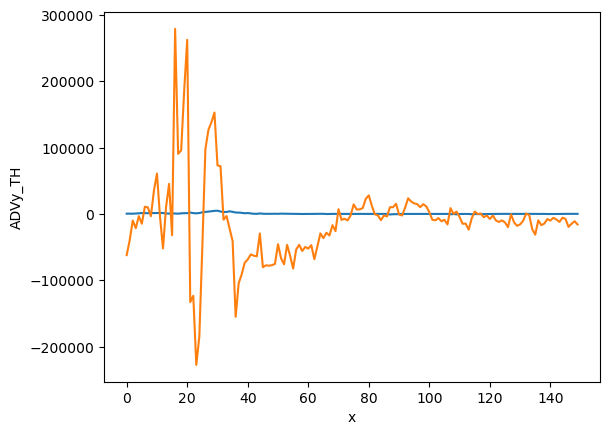

In [100]:
(adv['DFxE_TH']*correct_flux).mean(dim='time',skipna=True).sum(dim='k',skipna=True).plot()
adv['ADVy_TH'].sum(dim='k',skipna=True).mean(dim='time',skipna=True).plot()
#plt.ylim(-2000,0)

/home/drdarby/miniconda3/envs/mitgcm/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in cp_t_exact
  return func(*(_execute_task(a, cache) for a in args))


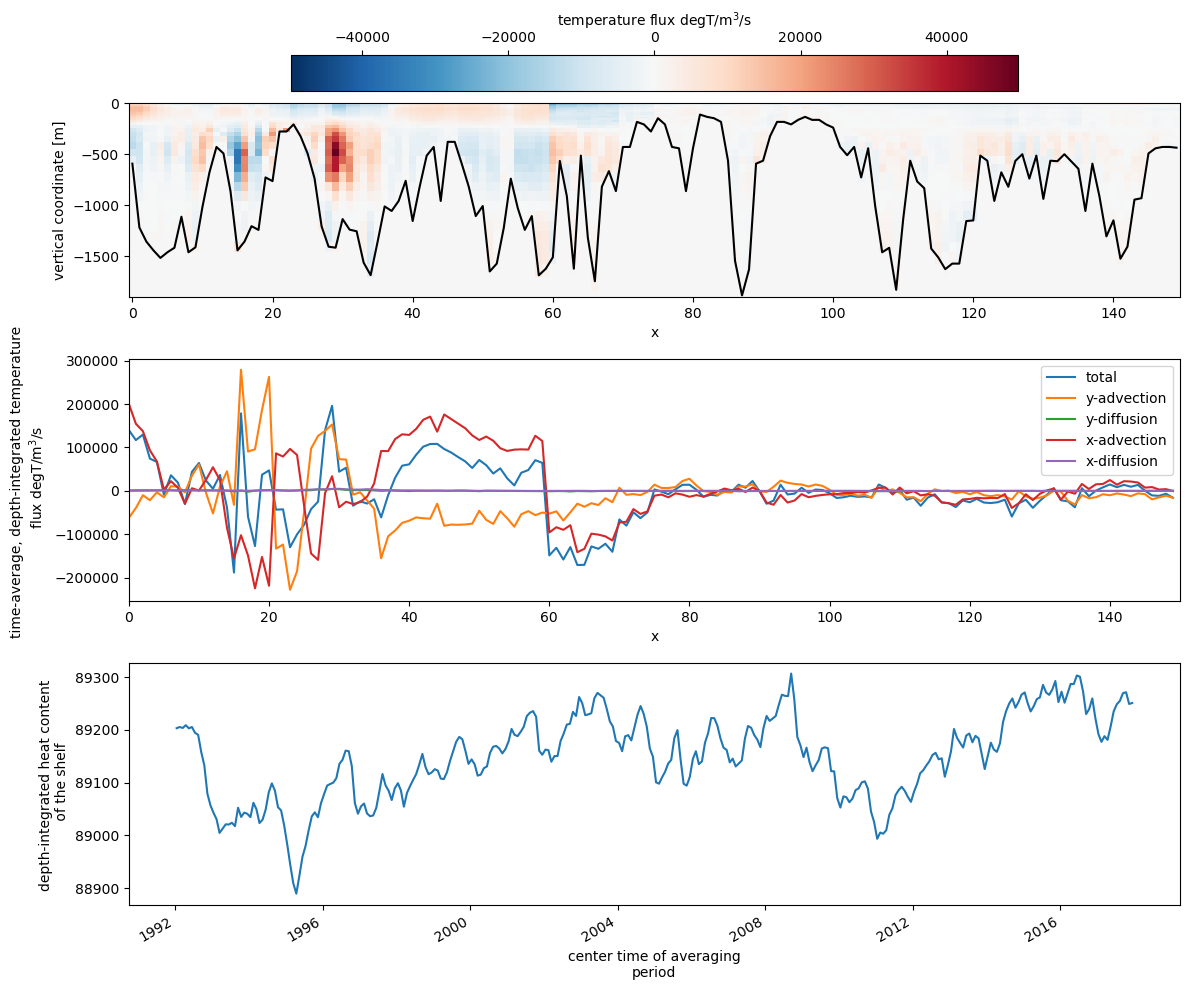

In [26]:
fig,ax = plt.subplots(ncols=1, nrows=3,figsize=(12,10))

(adv['ADVy_TH']+adv['DFyE_TH']+adv['ADVx_TH']*correct_flux + adv['DFxE_TH']*correct_flux).mean(dim='time',skipna=True).plot(y='depth',ax=ax[0],cbar_kwargs={'location':'top','label':'temperature flux degT/m$^3$/s'})
ax[0].plot(x,np.array(depth_data)*-1,'black')
plt.tight_layout()
(adv['ADVy_TH']+adv['DFyE_TH']+adv['ADVx_TH']*correct_flux + adv['DFxE_TH']*correct_flux).sum(dim='k',skipna=True).mean(dim='time',skipna=True).plot(ax=ax[1],label='total')
adv['ADVy_TH'].sum(dim='k',skipna=True).mean(dim='time',skipna=True).plot(ax=ax[1],label='y-advection')
adv['DFyE_TH'].sum(dim='k',skipna=True).mean(dim='time',skipna=True).plot(ax=ax[1],label='y-diffusion')
(adv['ADVx_TH']*correct_flux).sum(dim='k',skipna=True).mean(dim='time',skipna=True).plot(ax=ax[1],label='x-advection')
(adv['DFxE_TH']*correct_flux).sum(dim='k',skipna=True).mean(dim='time',skipna=True).plot(ax=ax[1],label='x-diffusion')
ax[1].legend()
ax[1].set_ylabel('time-average, depth-integrated temperature \n flux degT/m$^3$/s')
heat_270.where(shelf_mask[1:,:]).sum(dim='k',skipna=True).mean(dim='i',skipna=True).mean(dim='j',skipna=True).plot(ax=ax[2])

ax[2].set_ylabel('depth-integrated heat content \n of the shelf')
ax[1].set_xlim(0,150)
ax[0].set_ylim(-1900,0)
ax[2].set_title('')
plt.tight_layout()

In [109]:
plt.close()

In [10]:
advec_tot = advec['ADVy_TH'] + adv['DFyE_TH'] + adv['ADVx_TH']*correct_flux + adv['DFxE_TH']*correct_flux

In [ ]:
#advec_tot.to_netcdf(path_llc270+'shelf-subsample/advec_total_withcorr.nc')

In [ ]:
advec_tot

(-2000.0, 0.0)

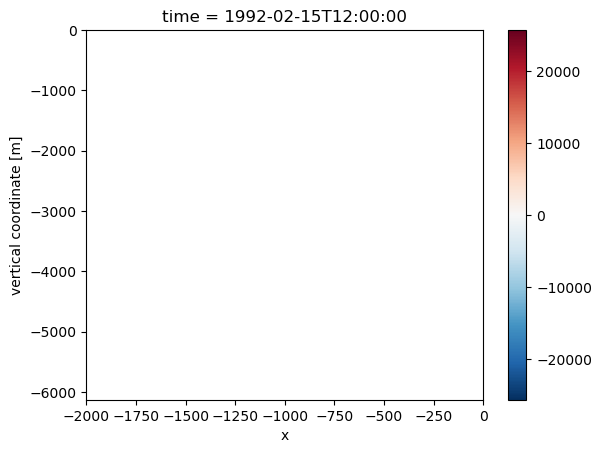

In [13]:
advec_tot.isel(time=1).plot(y='depth')#.mean(dim='time',skipna=True).plot(y='depth')
plt.xlim(-2000,0)

In [604]:
plt.close()

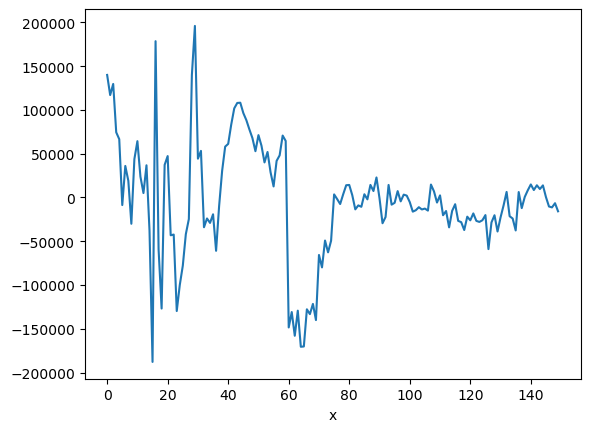

In [12]:
advec_tot.sum(dim='k',skipna=True).mean(dim='time',skipna=True).plot()

In [601]:
advec_tot.mean(dim='k',skipna=True).mean().plot()

KeyboardInterrupt: 